In [124]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#from scipy import ndimage as nd
#from scipy.fft import fft, ifft
#from scipy import fftpack

(3264, 4928)

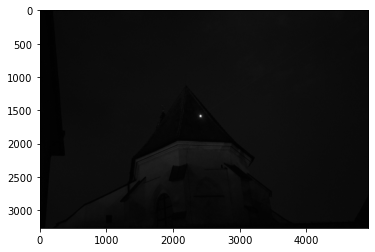

In [125]:
#img = cv2.imread("../dataset/honor/1.jpg")
#img = cv2.imread("../dataset/images/DSC_2749.JPG")
img = cv2.imread("../dataset/images/DSC_2757.JPG")
# img = cv2.resize(img, [1600, 1060])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, 'gray')
gray.shape

In [126]:
def mask_from_high_intensities(image, percent: int):
    hp = np.percentile(image, 100 - percent)
    ret, thres = cv2.threshold(image, thresh=hp, maxval=255, type=cv2.THRESH_BINARY)
    kernel_size = 7
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    binary = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel)
    # fig, ax = plt.subplots(figsize=(10, 8))
    # ax.imshow(binary, cmap='gray')
    # fig.tight_layout()
    return binary

def remove_top_high_intensities(image, mask):
    replacement_value = np.percentile(image, 50)
    removed_blobs = image.copy()
    removed_blobs[mask == 255] = replacement_value
    # fig, ax = plt.subplots(figsize=(10, 8))
    # ax.imshow(removed_blobs, cmap='gray')
    # fig.tight_layout()
    return removed_blobs

In [127]:
def get_top_high_intensities(image, percent: int):
    threshold = np.percentile(image, 100 - percent)
    ret, thres = cv2.threshold(image, threshold, maxval=255,
                               type=cv2.THRESH_BINARY)
    return thres

## Iteratively remove blobs
* Remove values with high intensity while retaining lines
* Get the top high intensities from the image
* Repeat until it stabilizes
* Run HoughLines

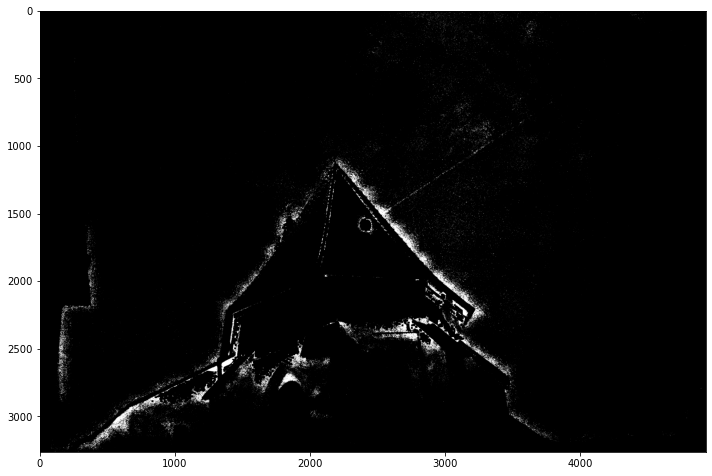

In [133]:
tmp_image = gray.copy()

top_intensities = None
while True:
    mask = mask_from_high_intensities(tmp_image, 5)
    if np.sum(mask) == 0:
        break
    tmp_image = remove_top_high_intensities(tmp_image, mask)
    top_intensities = get_top_high_intensities(tmp_image, 2)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(48,48))
tmp_image = clahe.apply(tmp_image)
tmp_image = remove_top_high_intensities(tmp_image, mask)
top_intensities = get_top_high_intensities(tmp_image, 2)

if top_intensities is not None:
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(top_intensities, cmap='gray')
    fig.tight_layout()

107019

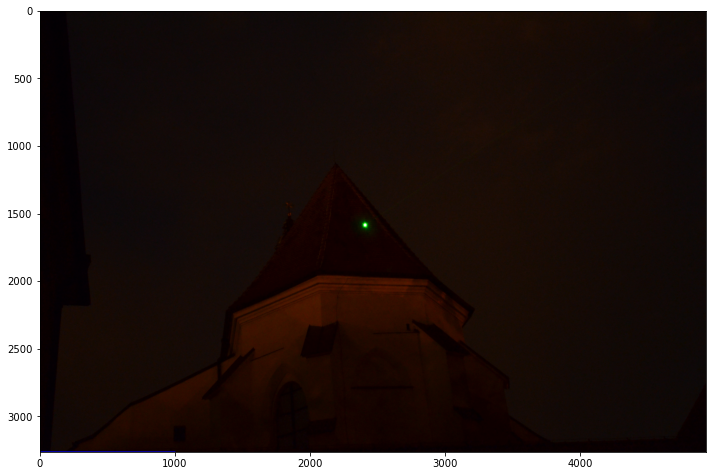

In [132]:
import math

drawing = img.copy()
lines = cv2.HoughLines(top_intensities, 1, np.pi / 180, 50)

if lines is not None:
    for line in lines[:1]:
        for rho, theta in line:
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(drawing, pt1, pt2, (0,0,255), 5, cv2.LINE_AA)

fig, ax = plt.subplots(figsize=(10, 8))
plt.imshow(drawing)
fig.tight_layout()
len(lines)

In [130]:
lines.shape

(57398, 1, 2)